In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = 'Data/eNTERFACE06_EMOBRAIN/Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf'
raw = mne.io.read_raw_bdf(fname, preload=True)

Extracting EDF parameters from e:\QUY\Research\EEG\Data\eNTERFACE06_EMOBRAIN\Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339199  =      0.000 ...  1324.996 secs...


In [3]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 67.0 Hz
 meas_date: 2006-08-03 19:12:34 UTC
 nchan: 73
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>

In [4]:
n_raw = raw.copy().notch_filter(50).filter(0.5 ,67)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 67 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 67.00 Hz
- Upper transition bandwidth: 16.75 Hz (-6 dB cutoff frequency: 75.38 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


In [5]:
n_psd = n_raw.compute_psd()
psd = raw.compute_psd()
n_raw.info.ch_names

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_8408\1057611499.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot(picks = ['FC3'])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


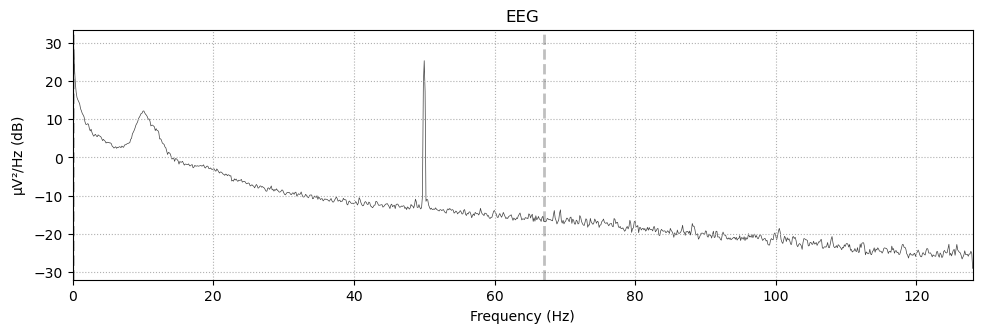

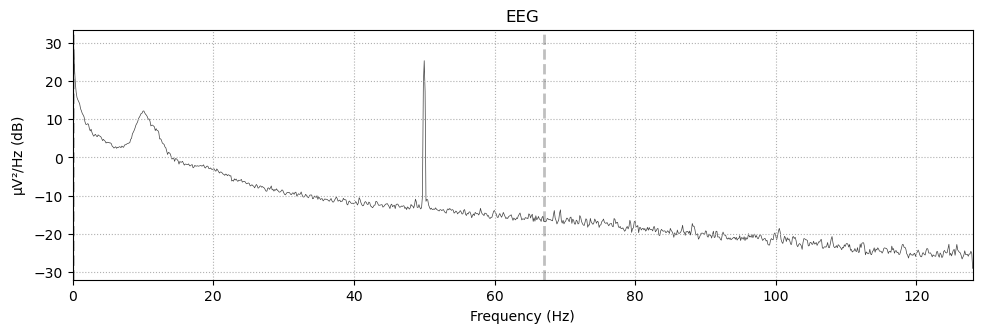

In [6]:
psd.plot(picks = ['FC3'])

Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_8408\4199002171.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  n_psd.plot(picks = ['FC3'])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


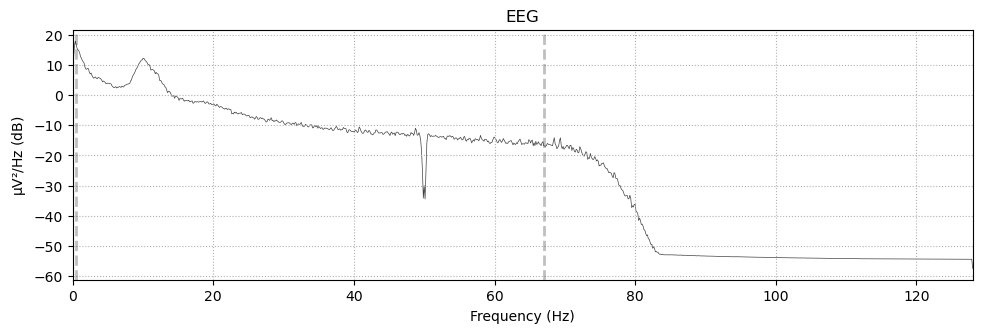

In [7]:
n_psd.plot(picks = ['FC3'])


In [8]:
# raw.plot()
# n_raw.plot()

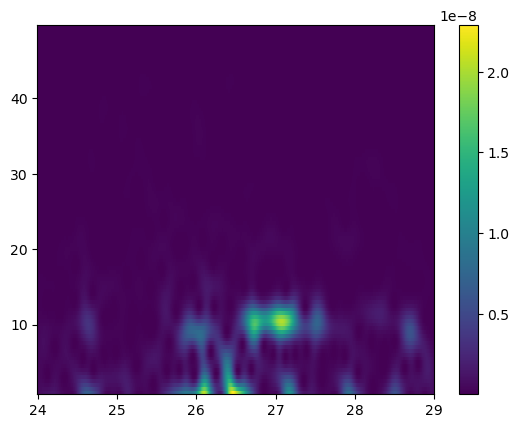

In [18]:
view_length = 5
view_start = 24
view_chan = ['FC3', 'FC5']
view_data = n_raw.get_data(picks=view_chan, tmin=view_start, tmax=view_start+view_length)
# epoch = mne.Epochs(n_raw, event=None, tmin=view_start, tmax=view_start+view_length)
epoch = np.expand_dims(view_data, 1)
freqs_1 = np.arange(1, 50.0, 0.5)
test_morlet_1 = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs_1, freqs_1/2, output = 'power')
X_1, Y_1 = np.meshgrid(np.linspace(view_start, view_start+view_length, view_data.shape[1]), freqs_1)
plt.pcolormesh(X_1, Y_1, test_morlet_1[0, 0])
plt.colorbar()
plt.show()


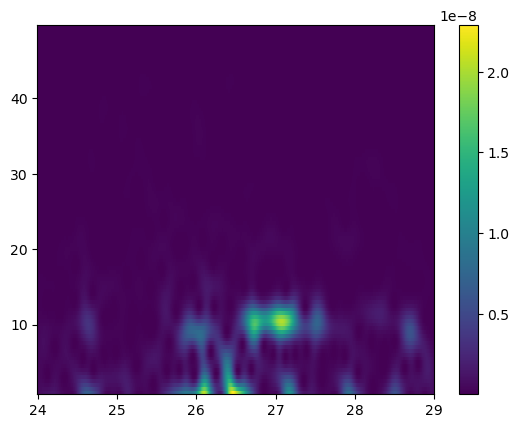

In [10]:
freqs_2 = np.arange(1, 50.0, 0.5)
test_morlet_2 = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs_2, freqs_2/2, output = 'power')
X_2, Y_2 = np.meshgrid(np.linspace(view_start, view_start+view_length, view_data.shape[1]), freqs_2)
plt.pcolormesh(X_2, Y_2, test_morlet_1[0, 0])
plt.colorbar()
plt.show()

Effective window size : 0.504 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_8408\3727270215.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  n_raw.compute_psd(tmin=26.7, tmax=27.2).plot(picks=['FC3'])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


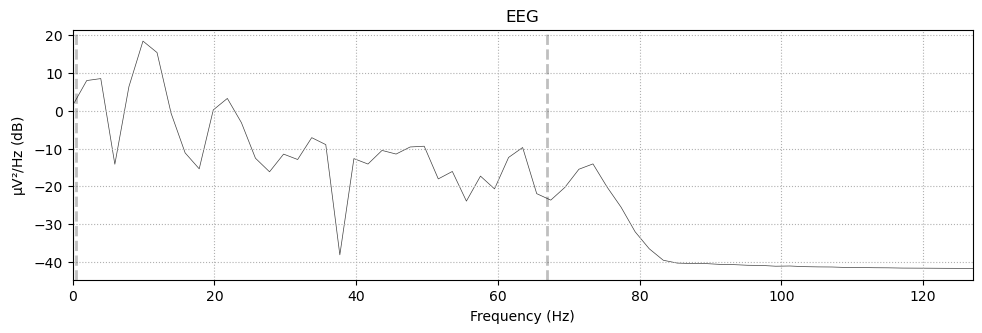

In [11]:
n_raw.compute_psd(tmin=26.7, tmax=27.2).plot(picks=['FC3'])

In [12]:
fname = 'Data/eNTERFACE06_EMOBRAIN/Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf.mrk'
marker = open(fname).read()


In [13]:
line_cut = marker.rsplit('\n')
cell_cut =line_cut[1].rsplit('\t')
# marker_onset = np.empty(shape=(2,1), dtype=int)
# marker_durt = np.ndarray(shape=0, dtype=int)
# marker_note = np.ndarray(shape=0, dtype=str)
marker_onset = [[],[]]
marker_durt = []
marker_note = []

for line in line_cut:
    cell = line.rsplit('\t')
    # print(cell)
    if (len(cell) == 4):
        marker_onset = np.append(marker_onset, [[int(cell[1])], [int(cell[2])]], axis=1)
        marker_durt = np.append(marker_durt, int(cell[3].replace('"','')))
        marker_note = np.append(marker_note, cell[3])
        

In [16]:
marker_anot = mne.Annotations(
    onset=marker_onset[0,:]/256,
    duration=marker_durt/256,
    description=marker_note
)
n_raw.set_annotations(marker_anot)
n_raw.plot()

In [15]:
marker_onset[0,:]/339200

array([0.05849351, 0.05901828, 0.09344634, 0.09397406, 0.12391215,
       0.12443986, 0.15431014, 0.15483785, 0.1829658 , 0.18349646,
       0.21170696, 0.21223172, 0.23987618, 0.24040684, 0.26771226,
       0.26823703, 0.30058667, 0.30111439, 0.33610554, 0.3366362 ,
       0.36714328, 0.36767689, 0.39541274, 0.3959434 , 0.42787736,
       0.42840212, 0.46102594, 0.46155366, 0.49084611, 0.49137677,
       0.52170106, 0.52222877, 0.55274469, 0.55327535, 0.579602  ,
       0.58012972, 0.61313974, 0.6136704 , 0.64295991, 0.64348762,
       0.67771816, 0.67824587, 0.70357606, 0.70410083, 0.73255601,
       0.73308667, 0.76000295, 0.76053656, 0.7886704 , 0.78919517,
       0.81763267, 0.81816627, 0.84467866, 0.84520637, 0.8755395 ,
       0.87606722, 0.90812795, 0.90865566, 0.93357901, 0.93410967,
       0.94083726])